In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('dark_background')

cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'label']

df = pd.read_csv('adult.data', names=cols)

In [3]:
## Data exploration

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocessing & Exploration
- TODO: Opdrachten bedenken voor exploration

In [ ]:
# Check distributions and correlations
sns.pairplot(df)

Text(0.5, 1.0, 'Age distribution')

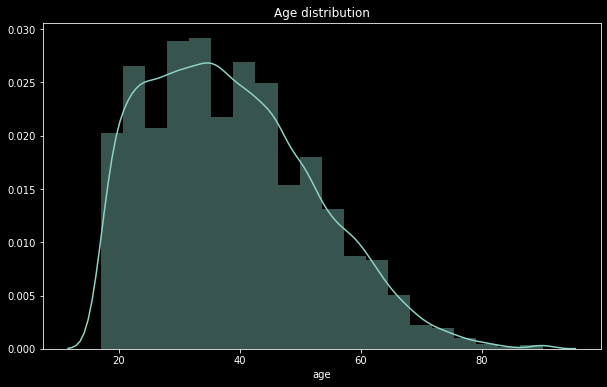

In [27]:
f, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['age'], bins=20)
ax.set_title('Age distribution')

In [ ]:
## Uitbreiden met meer exploration

# Preprocessing & cleaning of nominal and ordinal variables
- TODO: Opdrachten bedenken voor preprocessing & cleaning op basis van onderstaande stappen

In [45]:
# Check variables
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
label             object
dtype: object

In [66]:
# Object refers to a string value.
df.dtypes[lambda s: s == 'object']

workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
label             object
dtype: object

In [67]:
# Variable checks & cleaning for nominal variables

# Workclass - Spaces + unknown values
df.workclass.unique()
df.workclass = (df.workclass.apply(str.strip)
                            .str.replace('?', 'unknown'))

# Education - Spaces
df.education.unique()
df.education = df.education.apply(str.strip)

# Marital status - Spaces + unknown values
df.marital_status.unique()
df.marital_status = df.marital_status.apply(str.strip).replace('?', 'Unknown')

# Occupation - Spaces + unknown values
df.occupation.unique()
df.occupation = df.occupation.apply(str.strip).replace('?', 'Unknown')

# Relationship - OK
df.relationship.value_counts()

# Sex - OK
df.sex.value_counts()

# Race - OK
df.race.value_counts()

# Native country - Spaces + unknown values
df.native_country.value_counts()
df.native_country = df.native_country.apply(str.strip)
df.native_country = df.native_country.replace('?', 'Unknown')

# Label - Spaces
df.label.unique()
df.label = df.label.apply(str.strip)

## Preprocessing & cleaning of continuous and interval variables
- TODO: Opdrachten bedenken voor preprocessing & cleaning op basis van onderstaande stappen

In [69]:
df.dtypes[lambda s: s != 'object']

age               int64
fnlwgt            int64
education_num     int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
dtype: object

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

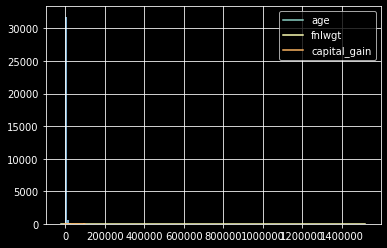

In [94]:
# Continuous and interval variables

# Age - OK
df.age.describe()
df.isnull().sum()

sns.kdeplot(df.age)

# Fnlwgt - Very skewed data, not sure if outliers. Perhaps a transformation can be helpful
df.fnlwgt.describe()

sns.kdeplot(df.fnlwgt)

df.fnlwgt.nlargest(10)

# Education_num - Actually appears to be an ordinal variable
df.education_num.hist()
df.education_num.isnull().sum()

# Capital_loss - weird data distribution, perhaps transformation is required. Also data is capped at 99999.
df.capital_gain.describe()
df.capital_loss.hist()

# Capital_gain - weird data distribution, perhaps transformation is required. Also data is capped at 99999.
df.capital_gain.hist()
sns.kdeplot(df.capital_gain)

# Hours_per_week - 99 hours per week is a bit high, but theoretically possible
df.hours_per_week.hist()
df.hours_per_week.describe()

# Preprocessing
- TODO: Opdrachten uitschrijven
- Determine categorical variables
- One-hot-encode categorical variable using Pandas or Sklearn.

In [101]:
# One hot encode data - create wide data format
data = pd.get_dummies(df, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

In [102]:
# Change weird label to useful mapping
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
label_binarizer.fit(data['label'])

data['label'] = label_binarizer.transform(data['label'])

## Setting up an experiment
- TODO: Opdrachten uitschrijven op basis van onderstaande
- Determine the target of interest
- Choose metrics/kpi's of interest
- Determine the baseline value
- Determine a validation technique
- Set up a test data set

#### Target of interest:
The target of interest is classifying the income class (i.e. <=50k per year or > 50k per year). We shall refer to the target as y.

In [121]:
target = data['label']

#### Metrics of interest
To determine how well the model performs, we need to quantify what 'well' means. In our case we are interested in correctly classifying the incomes. For this we can use accuracy as a first metric. Other metrics of interest could be: precision, recall, f1-score, AUC

In [122]:
from sklearn.metrics import accuracy_score

#### Setting a baseline
The easiest baseline value that we can set is to predict the majority class. In this case around 76% of the cases are <=50k per year. If we predict this class for all data points, we should already be correct in about 76% of the cases. We may then attempt to improve this score using a more elegant solution such as machine learning or business ruling.

#### Determine a validation technique
It's important to correctly validate the performance of your model. Training and testing on the same data is not allowed due to information leakage. For this we can use a validation set and test set. We may also use K-fold cross validation. In general we use a validation set to find the optimal parameters and cross validation to obtain the most realistic performance score.

#### Set up a validation and test set
Setting up a validation and test set may be done by hand or using sklearn. You have to decide on the split ratio of the data (i.e. 0.80 train, 0.10 validation, 0.10 test). Make sure to shuffle the data before splitting.

## Modeling (part 1 - the baseline)
When we have set up an experiment, we may start modelling the data. For this part you'll need to do the following things:
- Create a train, validation and test data set
- Create a new variable 'baseline' where we predict the baseline class
- Calculate the accuracy of the baseline prediction. You may do this by hand or use one of the metrics provided by scikit-learn, see the documentation for instructions

In [129]:
# Create train, val, test
from sklearn.model_selection import train_test_split
train, val_test = train_test_split(data, train_size=0.8)
val, test = train_test_split(val_test, train_size=0.5)

print(f"Validating shapes: train = {train.shape}, val = {val.shape}, test = {test.shape}")

Validating shapes: train = (26048, 110), val = (3256, 110), test = (3257, 110)


In [120]:
# Compute majority class
majority_class = data.label.value_counts().idxmax()
print(f"Majority class is {majority_class}")

# Create baseline value and assign majority class
data['baseline'] = majority_class

# Compute accuracy
from sklearn.metrics import accuracy_score
baseline_accuracy = accuracy_score(data['label'], data['baseline'])

print(f"Baseline accuracy is: {baseline_accuracy:.3f}")

Majority class is 0
Baseline accuracy is: 0.759


## Modeling (part 2 - logistic regression)
We now know the baseline performance. For this part you'll use the good old logistic regression. 
- Logistic regression makes some implicit assumptions about the underlying data, investigate what these are
- Use the logistic regression module from scikit-learn to do the following:
    - Import the logistic regression
    - Create a model variable and assign the regression object (see documentation on how to do this)
    - Use your **training data** to fit the regression model (see documentation on how to fit a model)
- Like in previous step, calculate the accuracy of the logistic regression prediction

In [133]:
from sklearn.linear_model import LogisticRegression
variables = data.drop('label', axis=1).columns
target = 'label'

reg = LogisticRegression()
reg.fit(X=train[variables], y=train[target])

C:\Users\pnl0c12n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
y_hat = reg.predict(val[variables])
logistic_regression_accuracy = accuracy_score(val[target], y_hat)
print(f"Logistic regression accuracy is: {logistic_regression_accuracy:.3f}")

Logistic regression accuracy is: 0.799


## Modeling (part 3 - Random Forest)


In [138]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X=train[variables], y=train[target])

C:\Users\pnl0c12n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
y_hat_rf = clf.predict(val[variables])
random_forest_accuracy = accuracy_score(val[target], y_hat)
print(f"Logistic regression accuracy is: {random_forest_accuracy:.3f}")

Logistic regression accuracy is: 0.799


In [146]:
feature_importances = pd.DataFrame(data=list(zip(variables, clf.feature_importances_)), columns=['var', 'importance']).sort_values('importance', ascending=False)

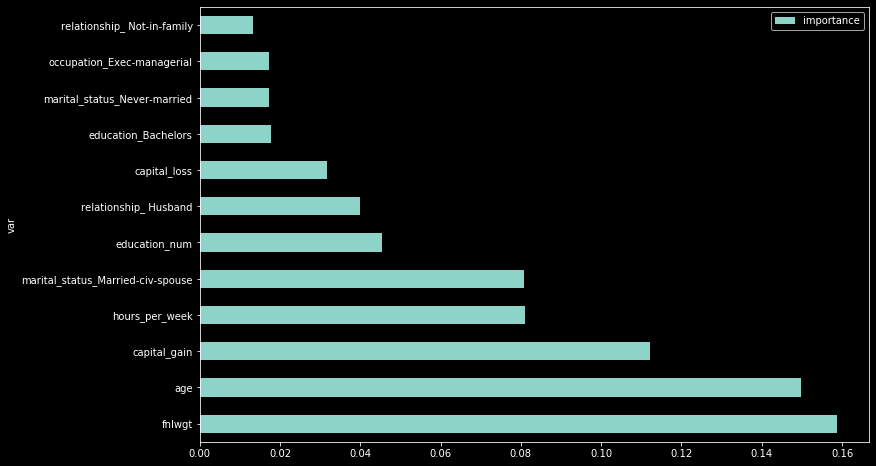

In [167]:
feature_importances.set_index('var').nlargest(12, columns=['importance']).plot(kind='barh', figsize=(12,8))

# In-depth analysis
**- TODO: Opdrachten bedenken voor verder onderzoek (AUC, Confusion matrix, FP/FN investigation - allemaal includeren!)**

So we have three working models (a baseline, logistic regression and random forest classifier). Since modelling is an iterative process, we can and should now further investigate what could possibly improve the performance. We could do one or more of the following steps:
- Acquire more data
- Investigate incorrectly classified cases, see if there is a connection
- Tune model parameters

Since getting more data is hard at this time, we should investigate what cases are incorrectly classified. 

Confusion matrix, without normalization
[[2322  150]
 [ 325  459]]


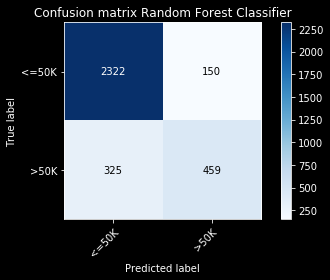

In [187]:
plot_confusion_matrix(val[target], y_hat_rf, classes=label_binarizer.classes_, title="Confusion matrix Random Forest Classifier")

In [ ]:
## Makkelijkste manier bedenken om een goed onderzoeks dataframe te bouwen

In [189]:
val['y_hat_rf'] = y_hat_rf

C:\Users\pnl0c12n\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [194]:
y_hat_rf_frame = pd.DataFrame(data=y_hat_rf, index=val.index, columns=['rf_predict'])

In [199]:
df_check = df.join(y_hat_rf_frame, how='inner')

In [200]:
df_check[df_check.label != df_check.rf_predict]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label,rf_predict
4,28,private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
10,37,private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,0
19,43,self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K,0
25,56,local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K,0
54,47,self-emp-inc,109832,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K,0
74,79,private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K,0
77,67,unknown,212759,10th,6,Married-civ-spouse,Unknown,Husband,White,Male,0,0,2,United-States,<=50K,0
80,18,private,446839,HS-grad,9,Never-married,Sales,Not-in-family,White,Male,0,0,30,United-States,<=50K,0
81,52,private,276515,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,Cuba,<=50K,0
92,28,private,212563,Some-college,10,Divorced,Machine-op-inspct,Unmarried,Black,Female,0,0,25,United-States,<=50K,0


### Helper functions - offloaden naar library, to do :).

In [178]:
# HELPERS

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
